In [95]:
# Manipulation de données, calcul et visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from functools import reduce


## Chargement des données

Les données sont issues d'un capteur de vibrations et ont été collectées sur 20 jours.  
* spie_iot_exte_mesu.csv contient les différents canaux du capteur
* spie_iot_exte_vale.csv contient les valeurs associées à ces canaux (exemple 3011/3012/3013 pour X/Y/Z…)


In [96]:
filename_mesu = '15072021_spie_iot_exte_mesu.csv'
filename_vale = '15072021_spie_iot_exte_vale.csv'

In [97]:
df_mesu = pd.read_csv(f'data/{filename_mesu}', sep=';')
df_mesu.head(3)

,C_Mesu,T_Mesu,C_Equi,T_Type,T_Unit
0,3023,Ultrason CFCTR,61,decimal,NaN
1,3022,Température TOTAL,61,decimal,°C
2,3021,Vibration TOTAL,61,decimal,mm/s


In [98]:
df_vale = pd.read_csv(f'data/{filename_vale}', sep=';')
df_vale.head(3)

,C_Vale,C_Mesu,D_Vale,N_Vale,L_Etat
0,1153421,3020,28/05/2021 15:04,61,1
1,1153465,3019,28/05/2021 15:04,16,1
2,1153509,3018,28/05/2021 15:04,52,1


In [99]:
print('Informations Dataset Mesu :')
print(df_mesu.info())

Informations Dataset Mesu :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C_Mesu  17 non-null     int64 
 1   T_Mesu  17 non-null     object
 2   C_Equi  17 non-null     int64 
 3   T_Type  17 non-null     object
 4   T_Unit  15 non-null     object
dtypes: int64(2), object(3)
memory usage: 808.0+ bytes
None


On a donc 5 colonnes et 17 lignes.  
Il y a deux canaux qui n'ont pas d'unité.

In [100]:
df_mesu[df_mesu['T_Unit'].isnull() == True]

,C_Mesu,T_Mesu,C_Equi,T_Type,T_Unit
0,3023,Ultrason CFCTR,61,decimal,NaN
4,3019,Magnitude Y,61,decimal,NaN


In [101]:
print('Informations Dataset Vale :')
print(df_vale.info())

Informations Dataset Vale :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C_Vale  5801 non-null   object
 1   C_Mesu  5801 non-null   object
 2   D_Vale  5801 non-null   object
 3   N_Vale  5801 non-null   object
 4   L_Etat  5801 non-null   object
dtypes: object(5)
memory usage: 226.7+ KB
None


On a 5 colonnes pour 2 784 lignes, il n'y a pas de valeur manquante. Toutes les variables sont des entiers sauf D_Vale qui est une date et N_Vale qui est un nombre flottant.  
On modifie la colonne de la D_Vale pour avoir un format de date plus facile à manipuler.

In [102]:
formats = ['%Y-%m-%d %H:%M:%S.%f','%d/%m/%Y %H:%M', '%m/%d/%Y  %H:%M:%S', '%d-%m-%y', '%d-%m-%Y', '%Y-%m-%d', '%b %y', '%B %Y', '%d %B %Y']
df_vale['D_Vale'] = reduce(lambda l, r: l.combine_first(r), [pd.to_datetime(df_vale['D_Vale'], format=fmt, errors='coerce') for fmt in formats])
#df_vale['D_Vale'] =  pd.to_datetime(df_vale['D_Vale'], format='%Y-%m-%d %H:%M:%S.%f')

In [103]:
print(df_vale.dtypes)

C_Vale            object
C_Mesu            object
D_Vale    datetime64[ns]
N_Vale            object
L_Etat            object
dtype: object


La modification a bien été appliquée.

In [104]:
"""def plot_values(mesure):
    fig = plt.figure()
    df_tmp = df_vale[df_vale['C_Mesu']==mesure]
    title = f'Evolution de {df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item()}'
    xlabel = 'Date'
    ylabel = f'{df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item()} en {df_mesu[df_mesu["C_Mesu"]==mesure].T_Unit.item()}'
    plt.scatter(df_tmp['D_Vale'], df_tmp['N_Vale'])
    plt.gcf().set_size_inches((5, 5))
    plt.title(title, loc='center')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()"""

'def plot_values(mesure):\n    fig = plt.figure()\n    df_tmp = df_vale[df_vale[\'C_Mesu\']==mesure]\n    title = f\'Evolution de {df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item()}\'\n    xlabel = \'Date\'\n    ylabel = f\'{df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item()} en {df_mesu[df_mesu["C_Mesu"]==mesure].T_Unit.item()}\'\n    plt.scatter(df_tmp[\'D_Vale\'], df_tmp[\'N_Vale\'])\n    plt.gcf().set_size_inches((5, 5))\n    plt.title(title, loc=\'center\')\n    plt.xlabel(xlabel)\n    plt.ylabel(ylabel)\n    plt.show()'

In [105]:
"""for mesure in C_Mesu:
    plot_values(mesure)"""

'for mesure in C_Mesu:\n    plot_values(mesure)'

# Visualisation des données

In [106]:
df_mesu[df_mesu["C_Mesu"]==3020].T_Mesu.item()
#df_vale['C_Mesu'].unique()

'Compteur Count'

In [120]:
def plot_mesures(mesures):
    tot = len(mesures)
    cols = 2
    rows = tot //cols
    rows += tot % cols
    pos = range(1, tot + 1)
    fig = plt.figure(figsize=(20, 20))
    for mesure, k in zip(mesures, range(tot)):
        try:
            #print(f'C_Mesu {df_vale["C_Mesu"]}, mesure {mesure}')
            df_tmp = df_vale[df_vale['C_Mesu']==(mesure)]
            #print(mesure)
            #print(df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Mesu.item())
            #print(df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item())
            title = f'{df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Mesu.item()}'
            xlabel = 'Date'
            ylabel = f'{df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Mesu.item()} en {df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Unit.item()}'
            ax = fig.add_subplot(rows, cols, pos[k])
            ax = plt.scatter(df_tmp['D_Vale'], df_tmp['N_Vale'])
            #plt.gcf().set_size_inches((5, 5))
            plt.title(title, loc='center')
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
        except:
            pass
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    plt.show()

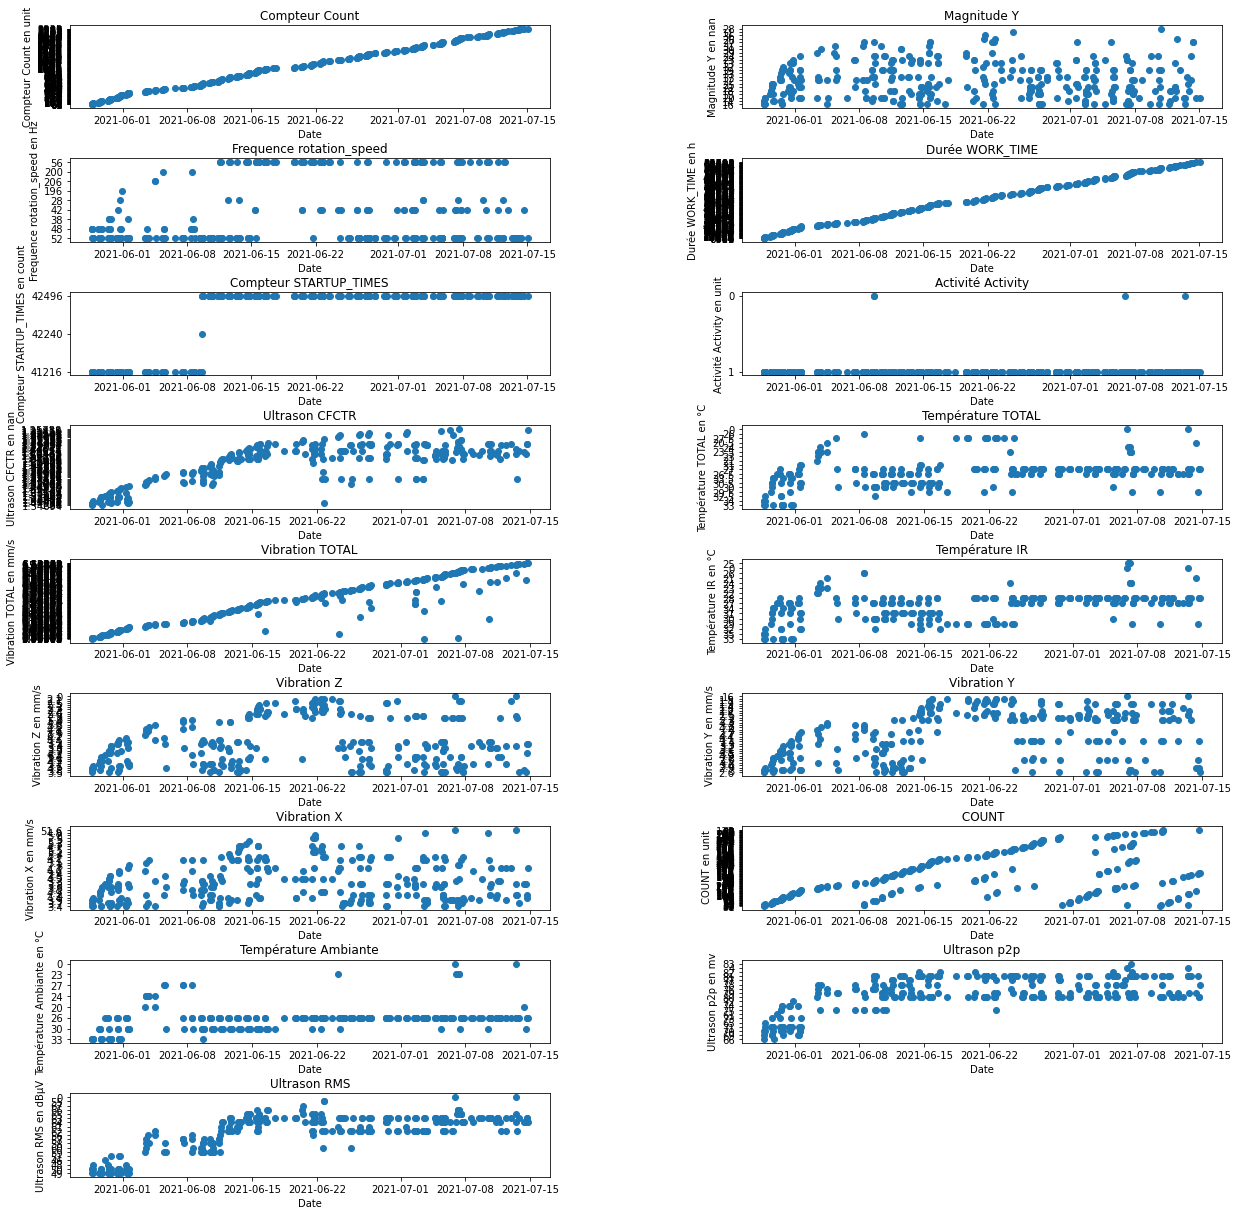

In [121]:
C_Mesu = df_vale.C_Mesu.unique()
plot_mesures(C_Mesu)

In [122]:
def boxplot_mesures(mesures):
    tot = len(mesures)
    cols = 2
    rows = tot //cols
    rows += tot % cols
    pos = range(1, tot + 1)
    fig = plt.figure(figsize=(20, 20))
    for mesure, k in zip(mesures, range(tot)):
        try:
            df_tmp = df_vale[df_vale['C_Mesu']==(mesure)]
            df_tmp = df_tmp.reset_index()
            title = f'{df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Mesu.item()}'
            xlabel = 'Date'
            ylabel = f'{df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Mesu.item()} en {df_mesu[df_mesu["C_Mesu"]==int(mesure)].T_Unit.item()}'
            ax = fig.add_subplot(rows, cols, pos[k])
            ax = sns.boxplot(data=df_tmp['N_Vale'])
            plt.title(title, loc='center')
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
        except:
            pass
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    plt.show()

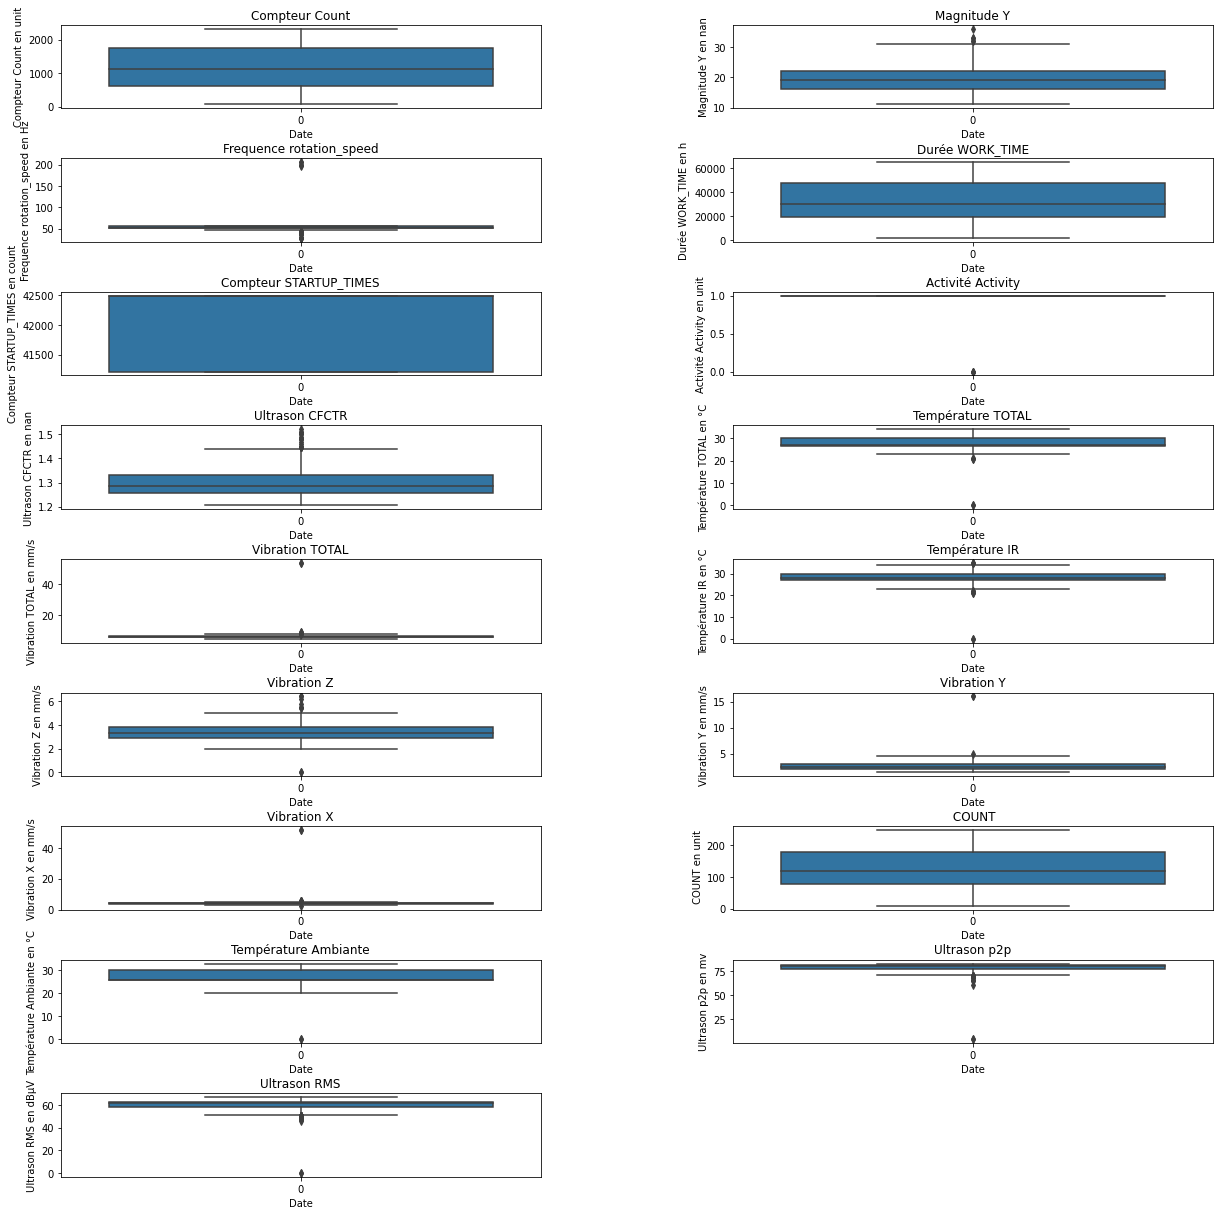

In [123]:
boxplot_mesures(C_Mesu)

Quelques valeurs aberrantes (outliers) en Vibration TOTAL/X/Z, Magnitude Y, Activité Activity et Frequence rotation_speed.

In [124]:
def plot_hist_mesures(mesures):
    tot = len(mesures)
    cols = 2
    rows = tot //cols
    rows += tot % cols
    pos = range(1, tot + 1)
    fig = plt.figure(figsize=(20, 20))
    for mesure, k in zip(mesures, range(tot)):
        df_tmp = df_vale[df_vale['C_Mesu']==mesure]
        title = f'{df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item()}'
        xlabel = 'Date'
        ylabel = f'{df_mesu[df_mesu["C_Mesu"]==mesure].T_Mesu.item()} en {df_mesu[df_mesu["C_Mesu"]==mesure].T_Unit.item()}'
        ax = fig.add_subplot(rows, cols, pos[k])
        ax = np.histogram(df_tmp['D_Vale'], df_tmp['N_Vale'])
        #plt.gcf().set_size_inches((5, 5))
        plt.title(title, loc='center')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    plt.show()

# Préparation des données

In [125]:
df = df_vale.loc[:, ['D_Vale']].copy()

In [126]:
df = df.drop_duplicates()

In [127]:
df = df.set_index('D_Vale')

In [128]:
columns = []
for i in range(len(df_mesu.T_Mesu)):
    columns.append(df_mesu.T_Mesu[i])

In [129]:
for c in columns:
    df[c] = 0

In [130]:
dict_c_mesu = {}
for i, r in df_mesu.iterrows():
    dict_c_mesu[r['C_Mesu']] = r['T_Mesu']
#dict_c_mesu[3022]

In [131]:
df.loc['2021-05-28 15:34:41']['Ultrason CFCTR']

Series([], Name: Ultrason CFCTR, dtype: int64)

In [148]:
for index, row in df_vale.iterrows():
    try:

        col = (dict_c_mesu[int(row["C_Mesu"])])
        df.loc[row["D_Vale"], col] = (row["N_Vale"])
        #print(col)
    except:
        pass
    #print(row["D_Vale"], row["N_Vale"], row["C_Mesu"])
df.head(3)

,Ultrason CFCTR,Température TOTAL,Vibration TOTAL,Compteur Count,Magnitude Y,Frequence rotation_speed,Durée WORK_TIME,Compteur STARTUP_TIMES,Activité Activity,Température IR,Vibration Z,Vibration Y,Vibration X,COUNT,Température Ambiante,Ultrason p2p,Ultrason RMS
D_Vale,,,,,,,,,,,,,,,,,
2021-05-28 15:04:00,0,0,0,61,16,52,6656,41216,1,0,0,0,0,0,0,0,0
2021-05-28 15:29:00,0,0,0,63,16,48,6656,41216,1,0,0,0,0,0,0,0,0
2021-05-28 15:34:00,1.34694,33,5.52901,0,0,0,0,0,1,33,3.5,2.6,3.4,31,33,66,49


In [149]:
def get_key(dico, val):
    for key, value in dico.items():
         if val == value:
            return key
 
    return "key doesn't exist"
 
print(get_key(dict_c_mesu, 'Compteur Count'))

3020


On peut voir que toutes les métriques ne sont pas relevées aux mêmes intervalles temporels. Les métriques qui nous intéressent le plus ont les mêmes fréquences de relevé. Pour éviter les 0 on va regrouper les métriques ayant les mêmes intervalles de relevés. 

In [158]:
col_compteur = ['Compteur Count', 'Magnitude Y', 'Frequence rotation_speed', 'Durée WORK_TIME', 'Compteur STARTUP_TIMES']
df_compteurs = df.loc[:, col_compteur].copy()
df_compteurs = df_compteurs.astype('float')
df_compteurs = df_compteurs[(df_compteurs)>0].copy()
df_compteurs = df_compteurs.dropna()
df_compteurs

,Compteur Count,Magnitude Y,Frequence rotation_speed,Durée WORK_TIME,Compteur STARTUP_TIMES
D_Vale,,,,,
2021-05-28 15:04:00,61.0,16.0,52.0,6656.0,41216.0
2021-05-28 15:29:00,63.0,16.0,48.0,6656.0,41216.0
2021-05-28 16:09:00,63.0,16.0,48.0,6912.0,41216.0
2021-05-28 16:29:00,65.0,14.0,48.0,6912.0,41216.0
2021-05-28 17:14:00,65.0,14.0,48.0,7168.0,41216.0
...,...,...,...,...,...
2021-07-14 04:08:00,2291.0,24.0,52.0,30468.0,42496.0
2021-07-14 07:18:00,2297.0,27.0,52.0,31236.0,42496.0
2021-07-14 07:53:00,2297.0,27.0,52.0,31492.0,42496.0


In [159]:
df_donnees = df.drop(columns=col_compteur)
df_donnees = df_donnees.astype('float')
df_donnees = df_donnees[df_donnees['Ultrason CFCTR']>0].copy()
df_donnees = df_donnees.dropna()
df_donnees

,Ultrason CFCTR,Température TOTAL,Vibration TOTAL,Activité Activity,Température IR,Vibration Z,Vibration Y,Vibration X,COUNT,Température Ambiante,Ultrason p2p,Ultrason RMS
D_Vale,,,,,,,,,,,,
2021-05-28 15:34:00,1.34694,33.0,5.52901,1.0,33.0,3.5,2.6,3.4,31.0,33.0,66.0,49.0
2021-05-28 16:49:00,1.38000,34.0,5.90678,1.0,35.0,3.8,2.6,3.7,32.0,33.0,69.0,50.0
2021-05-28 17:49:00,1.40000,34.0,6.46916,1.0,35.0,4.2,3.0,3.9,33.0,33.0,70.0,50.0
2021-05-28 18:09:00,1.40000,34.0,6.46916,1.0,35.0,4.2,3.0,3.9,33.0,33.0,70.0,50.0
2021-05-28 18:49:00,1.44898,33.0,6.73869,1.0,33.0,4.2,2.9,4.4,34.0,33.0,71.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14 07:38:00,1.23438,20.5,6.10655,1.0,21.0,3.8,2.9,3.8,124.0,20.0,79.0,64.0
2021-07-14 13:13:00,1.26562,29.5,5.73934,1.0,29.0,3.5,2.5,3.8,130.0,30.0,81.0,64.0
2021-07-14 15:33:00,1.26984,27.0,6.41249,1.0,28.0,4.0,2.4,4.4,132.0,26.0,80.0,63.0


In [160]:
df_donnees.to_csv('data/donnees_capteurs.csv')
df_donnees['Vibration TOTAL'].to_csv('data/donnees_vib_tot.csv')

In [161]:
df_donnees['Activité Activity'].unique()

array([1., 0.])

In [162]:
df_mesu

,C_Mesu,T_Mesu,C_Equi,T_Type,T_Unit
0,3023,Ultrason CFCTR,61,decimal,NaN
1,3022,Température TOTAL,61,decimal,°C
2,3021,Vibration TOTAL,61,decimal,mm/s
3,3020,Compteur Count,61,decimal,unit
4,3019,Magnitude Y,61,decimal,NaN
5,3018,Frequence rotation_speed,61,decimal,Hz
6,3017,Durée WORK_TIME,61,decimal,h
7,3016,Compteur STARTUP_TIMES,61,decimal,count
8,3015,Activité Activity,61,decimal,unit
9,3014,Température IR,61,decimal,°C


Ecart des valeurs aberrantes + courbe de tendance + moyennes haute / basse

In [163]:
def compute_z_score(column):
    z = np.abs(stats.zscore(column))
    return z

In [164]:
threshold = 3
a = compute_z_score(df_donnees['Température TOTAL'])
print(np.where(a > threshold))

(array([ 53, 294], dtype=int64),)


In [165]:
for k, v in dict_c_mesu.items():
    if v in df_donnees.columns:
        z = compute_z_score(df_donnees[v])
        print(f'Outliers positions {v}: {np.where(z > threshold)}')
    elif v in df_compteurs.columns:
        z = compute_z_score(df_compteurs[v])
        print(f'Outliers positions {v}: {np.where(z > threshold)}')
    else:
        print(f'Column "{v}" not found.')

Outliers positions Ultrason CFCTR: (array([15, 29, 30], dtype=int64),)
Outliers positions Température TOTAL: (array([ 53, 294], dtype=int64),)
Outliers positions Vibration TOTAL: (array([14, 47, 64], dtype=int64),)
Outliers positions Compteur Count: (array([], dtype=int64),)
Outliers positions Magnitude Y: (array([ 22,  36, 195], dtype=int64),)
Outliers positions Frequence rotation_speed: (array([51, 68, 69, 72, 85], dtype=int64),)
Outliers positions Durée WORK_TIME: (array([], dtype=int64),)
Outliers positions Compteur STARTUP_TIMES: (array([], dtype=int64),)
Outliers positions Activité Activity: (array([69], dtype=int64),)
Outliers positions Température IR: (array([ 53, 294], dtype=int64),)
Outliers positions Vibration Z: (array([14, 47, 54, 64], dtype=int64),)
Outliers positions Vibration Y: (array([14], dtype=int64),)
Outliers positions Vibration X: (array([ 33, 157], dtype=int64),)
Outliers positions  COUNT: (array([], dtype=int64),)
Outliers positions Température Ambiante: (array

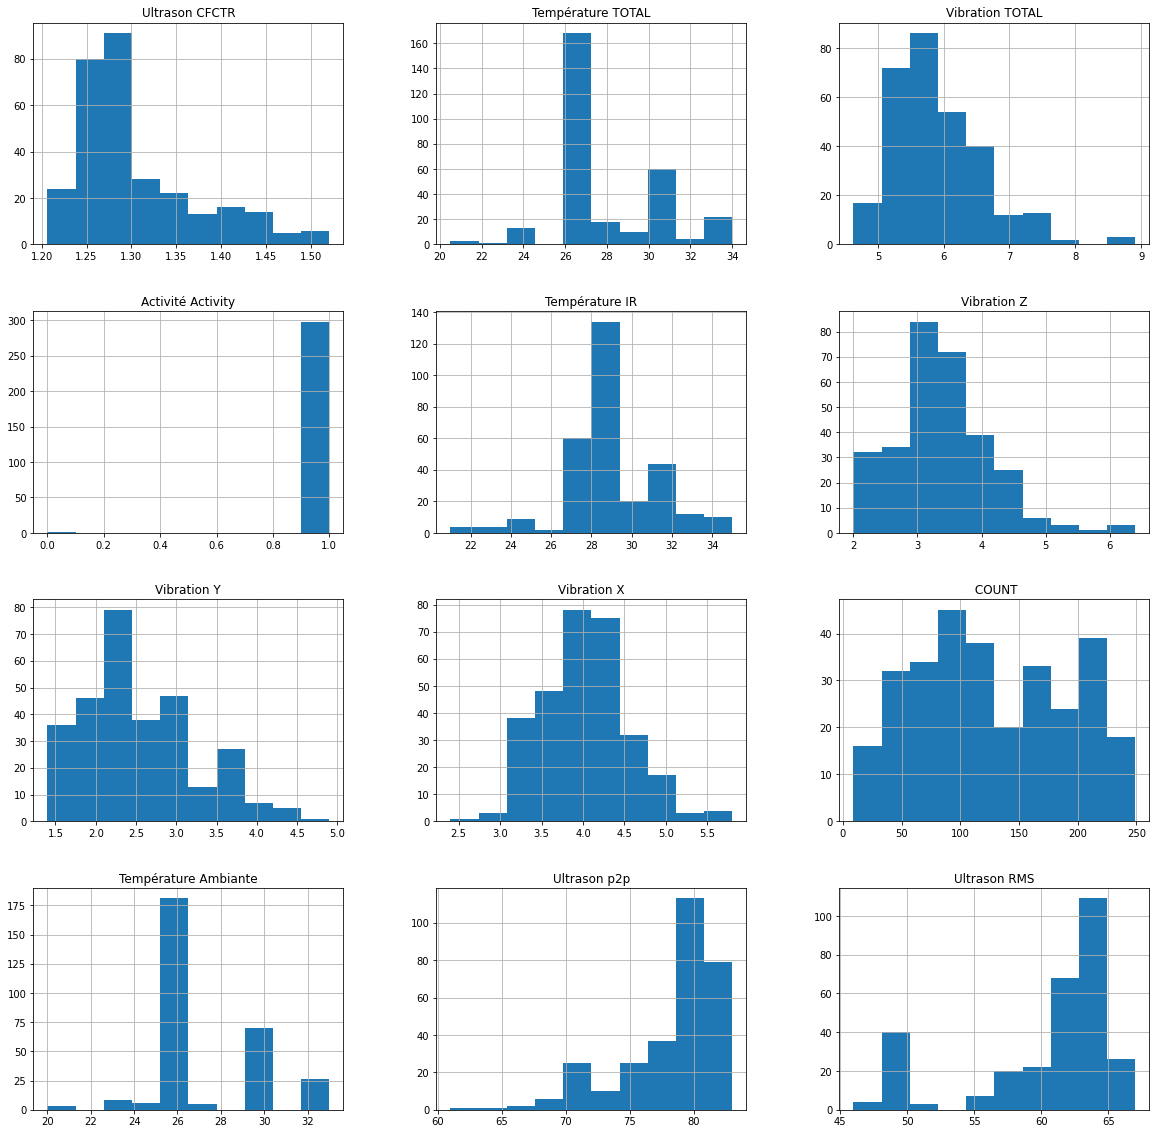

In [166]:
histogram = df_donnees.hist(figsize = (20,20))
plt.show()

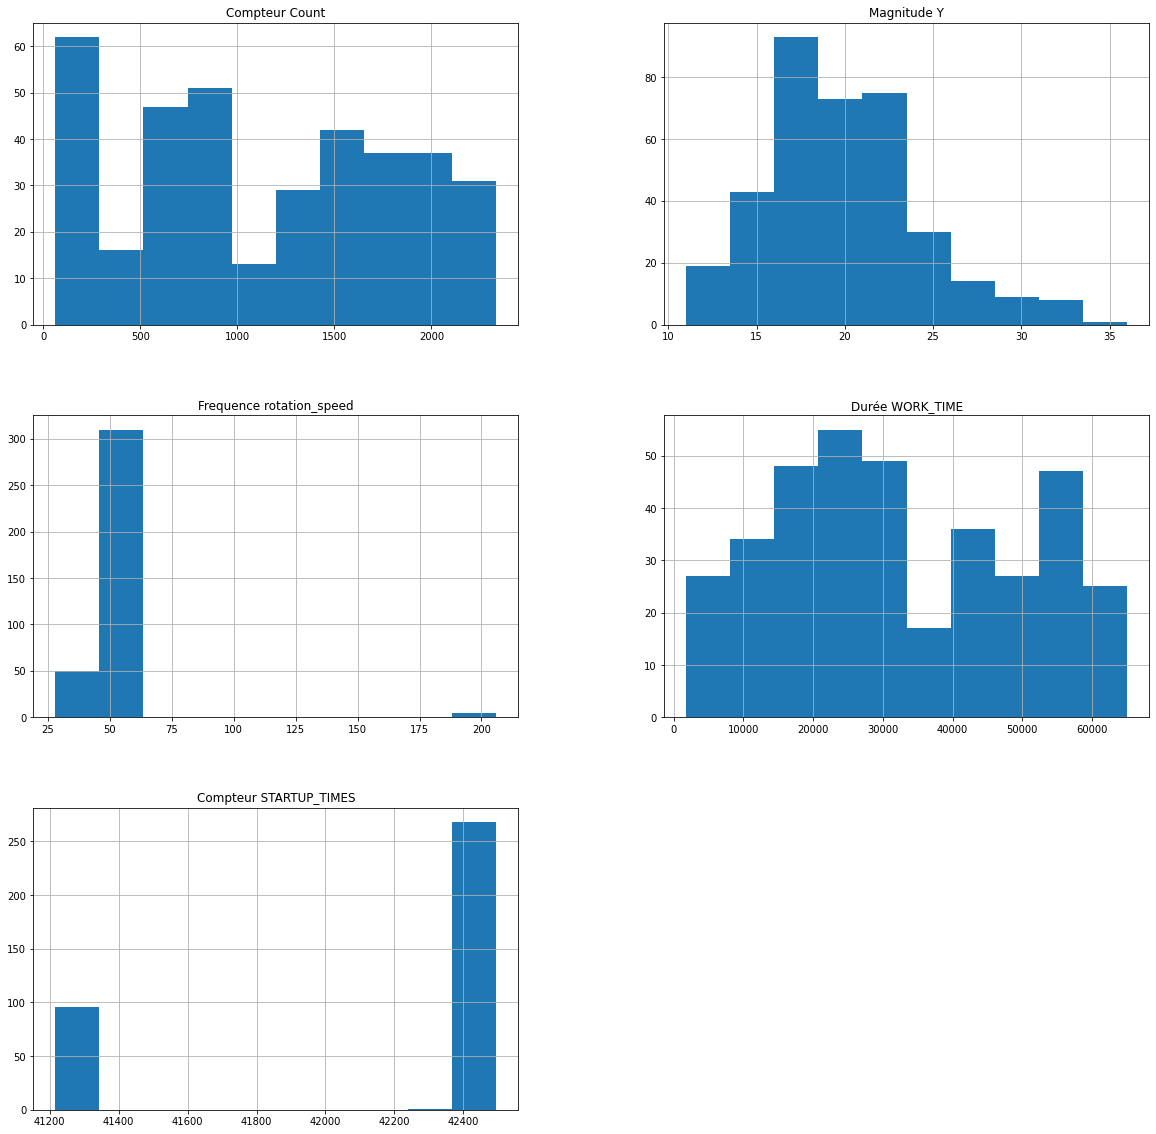

In [167]:
histogram = df_compteurs.hist(figsize = (20,20))
plt.show()

La distribution des variables n'est pas gaussienne. On n'appliquera donc pas de technique de prédiction supposant que la distribution est normale. 
Donc le Z-Score n'est pas le plus approprié pour détecter les outliers. On va utiliser un algo knn (non supervisé et qui ne fait pas d'hypothèse sur la distribution des données). KNN peut demander beaucoup de ressources mais ici on a peu de données. 
K-means
Fuzzy K-means
Hierarchical clustering

Proposer des outliers et demander validation ?

mesures de distances à tester : euclide / geo...

## KMeans from sklearn

Import de la fonction.

In [168]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

Détermination du nombre de clusters à créer grâce à la méthode du coude et de la silhouette. La méthode de la silhouette permet de d'évaluer la densité des clusters et à quel point ils sont bien séparés. Le score est calculé selon la distance entre les points d'un même cluster et la distance avec le cluster le plus proche. Il a une valeur entre -1 et 1. Un score de 0 indique que les clusters se chevauchent et un score de 1 indique qu'ils sont denses et bien séparés.  
On se base sur toutes les mesures de vibration ("Vibration TOTAL").  


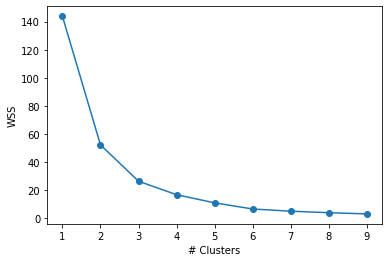

In [169]:
cluster_range = range(1,10)
cluster_wss = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(df_donnees[['Vibration TOTAL']])
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [170]:
import sklearn

ncluster_silhouette = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(df_donnees[['Vibration TOTAL']])
    score = sklearn.metrics.silhouette_score(df_donnees[['Vibration TOTAL']], kmeans.labels_, metric='euclidean')
    ncluster_silhouette.append(score)
    print (f"Silhouette score for k(clusters) = {i} is {score}")

Silhouette score for k(clusters) = 2 is 0.6083520883532277
Silhouette score for k(clusters) = 3 is 0.5738054959147575
Silhouette score for k(clusters) = 4 is 0.5450301441281469
Silhouette score for k(clusters) = 5 is 0.5457026571927831
Silhouette score for k(clusters) = 6 is 0.5761246511347401
Silhouette score for k(clusters) = 7 is 0.5561595504048962
Silhouette score for k(clusters) = 8 is 0.5717949338228787
Silhouette score for k(clusters) = 9 is 0.5617111993625195


In [171]:
def get_best_k_with_silhouette(ncluster_silhouette):
    for i in range(len(ncluster_silhouette)):
        if (i > 0) and (ncluster_silhouette[i] > ncluster_silhouette[i-1]) and (ncluster_silhouette[i] > ncluster_silhouette[i+1]):
            k_opti = i + 2
            return k_opti
            break
    return 0

k_opti = get_best_k_with_silhouette(ncluster_silhouette)
print(f'Optimal # of clusters for our data based on silhouette method: {k_opti}')

Optimal # of clusters for our data based on silhouette method: 6


In [175]:
kmeans = KMeans(n_clusters=k_opti, random_state=42)
df_donnees['cluster'] = kmeans.fit_predict(df_donnees[['Vibration TOTAL']])

In [176]:
def plot_clusters(dict_c_mesu):
    tot = len(dict_c_mesu)
    cols = 2
    rows = tot //cols
    rows += tot % cols
    pos = range(1, tot + 1)
    fig = plt.figure(figsize=(20, 20))
    for v, k in zip(df_donnees.columns, range(tot)):
        try:
            ax = fig.add_subplot(rows, cols, pos[k])
            ax = plt.scatter(df_donnees.index, df_donnees[v], c=df_donnees['cluster'], s=50, cmap='viridis')
            plt.title(v, loc='center')
            #plt.xlabel(xlabel)
            #plt.ylabel(ylabel)
        except:
            pass
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    plt.show()
        

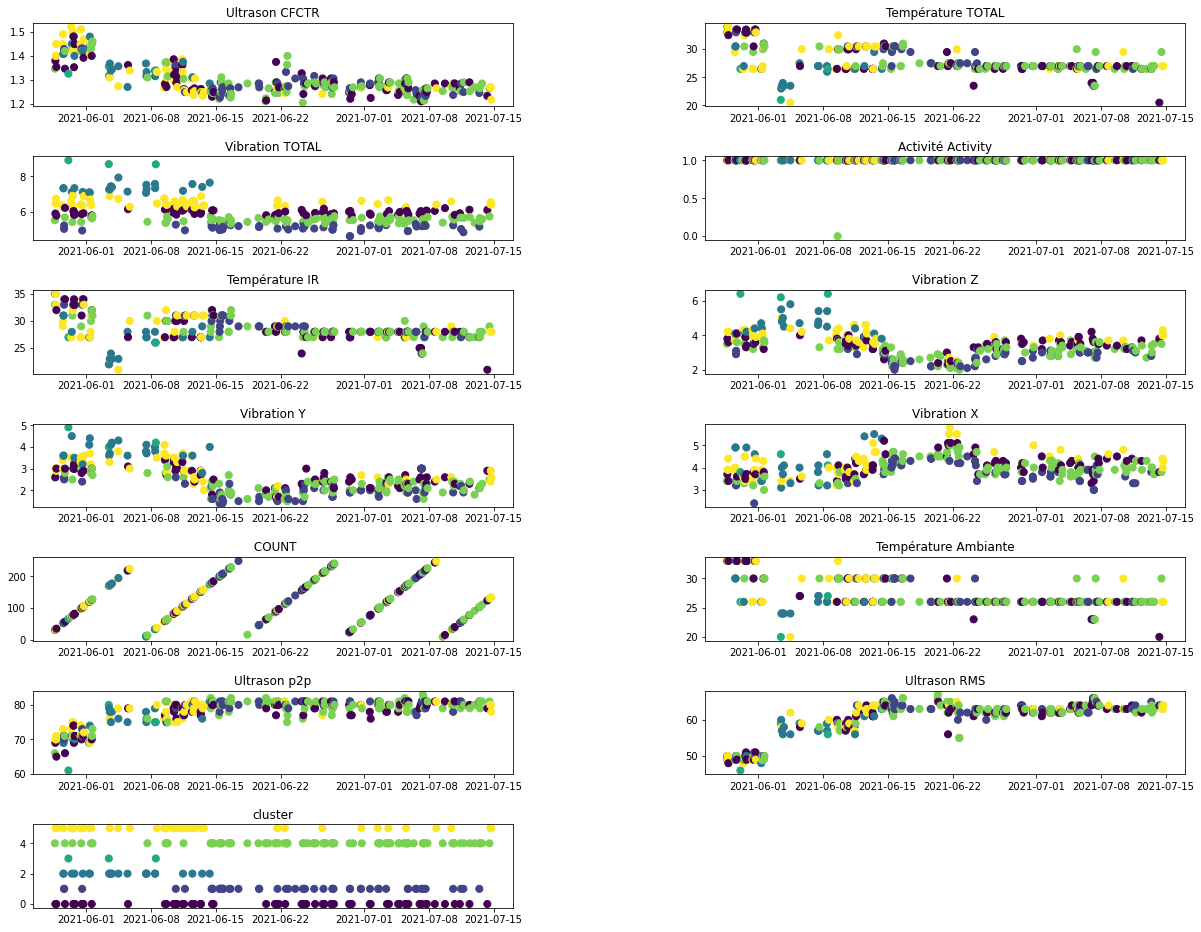

In [177]:
plot_clusters(dict_c_mesu)

In [ ]:
df_donnees['cluster']

D_Vale
2021-05-28 15:34:41    3
2021-05-28 16:49:41    1
2021-05-28 17:49:42    1
2021-05-28 18:09:42    1
2021-05-28 18:49:42    1
                      ..
2021-06-16 11:36:43    0
2021-06-16 14:16:43    0
2021-06-16 14:56:43    0
2021-06-16 15:46:44    0
2021-06-17 11:06:47    0
Name: cluster, Length: 142, dtype: int32

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def euclidian_dist(centroids):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        return distances
    
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification          

In [ ]:
custom_kmeans = K_Means(k=4)
custom_kmeans.fit(df_donnees[['Vibration TOTAL']].to_numpy())

c:\python39\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
"""for centroid in custom_kmeans.centroids:
    plt.scatter(custom_kmeans.centroids[centroid][0], custom_kmeans.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in custom_kmeans.classifications:
    color = colors[classification]
    for featureset in custom_kmeans.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)


plt.show()"""

'for centroid in custom_kmeans.centroids:\n    plt.scatter(custom_kmeans.centroids[centroid][0], custom_kmeans.centroids[centroid][1],\n                marker="o", color="k", s=150, linewidths=5)\n\nfor classification in custom_kmeans.classifications:\n    color = colors[classification]\n    for featureset in custom_kmeans.classifications[classification]:\n        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)\n\n\nplt.show()'

In [ ]:
"""custom_kmeans.centroids"""

'custom_kmeans.centroids'

In [ ]:
"""pred = custom_kmeans.predict(df_donnees[['Vibration TOTAL']].to_numpy())"""

"pred = custom_kmeans.predict(df_donnees[['Vibration TOTAL']].to_numpy())"

In [ ]:
import pandas as pd
from functools import reduce
                           # dd-mm-yy    dd-mm-YYYY    YYYY-mm-dd
df = pd.DataFrame({'date': ['12-01-01', '12-01-2001', '2001-07-05',
                            'Jan 19', 'January 2019', '1 January 2019']})

In [ ]:
formats = ['%d-%m-%y', '%d-%m-%Y', '%Y-%m-%d', '%b %y', '%B %Y', '%d %B %Y']
df.date = reduce(lambda l, r: l.combine_first(r), [pd.to_datetime(df.date, format=fmt, errors='coerce') for fmt in formats])


In [ ]:
df

,date
0,2001-01-12
1,2001-01-12
2,2001-07-05
3,2019-01-01
4,2019-01-01
5,2019-01-01
